<a href="https://colab.research.google.com/github/jitendramishra1024/EVA5B2/blob/main/opencv_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# YOLO WITH OPEN CV 

#Adapted from :
#https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/

#STEP 0 : 
  #HOW TO INSTALL YOLO 
#STEP 1:
  #DOWNLOAD REQUIRED FILE /WEIGHTS 
#STEP 2:
  #DOWNLOAD IMAGE 
# STEP 3 :
  #IMPORT LIBRARY AND LOAD YOLO 
# STEP 4:
  # CREATE BLOB AND DETECTION
# STEP 5:
  #create class_ids, confidences , boxes 
#STEP 6:
  #NON MAX SUPRESSION 
# STEp 7 :
  #DISPAY OUTPUT IMAGE 

In [2]:
#HOW TO INSTALL YOLO

#3 most used and known frameworks compatible with YOLO 

#Darknet : it’s the framework built from the developer of YOLO and made specifically for yolo.
  #Advantage: it’s fast, it can work with GPU or CPU
  #Disadvantage: it olny works with Linux os
#Darkflow: it’s the adaptation of darknet to Tensorflow (another deep leanring framework).
  #Advantage: it’s fast, it can work with GPU or CPU, and it’s also compatible with Linux, Windows and Mac.
  #Disadvantage: the installation it’s really complex, especially on windows
#Opencv: also opencv has a deep learning framework that works with YOLO. Just make sure you have opencv 3.4.2 at least.
  #Advantage: it works without needing to install anything except opencv.
  #Disadvantage: it only works with CPU, so you can’t get really high speed to process videos in real time.

In [3]:
#import 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# STEP 1 :
   # DOWNLOAD REQUIRED FILES 
  ###  Weight file: it’s the trained model, the core of the algorythm to detect the objects.
  ### Cfg file: it’s the configuration file, where there are all the settings of the algorythm.
  ### Name files: contains the name of the objects that the algorythm can detect.

In [5]:

%%bash
mkdir -p data
wget https://pjreddie.com/media/files/yolov3.weights -P data
wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -P data
wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -P data

--2021-05-07 13:36:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights.8’

     0K .......... .......... .......... .......... ..........  0% 1.25M 3m9s
    50K .......... .......... .......... .......... ..........  0% 1.27M 3m7s
   100K .......... .......... .......... .......... ..........  0% 74.8M 2m6s
   150K .......... .......... .......... .......... ..........  0% 1.29M 2m20s
   200K .......... .......... .......... .......... ..........  0% 71.3M 1m53s
   250K .......... .......... .......... .......... ..........  0% 50.3M 95s
   300K .......... .......... .......... .......... ..........  0% 37.5M 82s
   350K .......... .......... .......... .......... ..........  0% 44.0M 73s
   400K .......... .......... .........

In [6]:
#STEP 2: 
  #LOAD IMAGE 


In [7]:
%rm -r /content/SWAG_DNN
!git clone https://github.com/jitendramishra1024/SWAG_DNN.git
#%cd SWAG_DNN

path='/content/SWAG_DNN/img'
#img_name=JITENDRA_IMAGE_INPUT.jpg

Cloning into 'SWAG_DNN'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 259 (delta 148), reused 176 (delta 70), pack-reused 0
Receiving objects: 100% (259/259), 434.99 KiB | 4.78 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [8]:
img = cv2.imread(path+"/JITENDRA_IMAGE_INPUT_1.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [9]:
# STEP 3 :
  #LOAD YOLO 

In [10]:
#load yolo
net = cv2.dnn.readNet("data/yolov3.weights", "data/yolov3.cfg")
classes = []
with open("data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [11]:
# STEP 4:
  # CREATE BLOB AND DETECTION
  

In [12]:
#CREATE BLOB

# we can’t use right away the full image on the network, but first we need it to convert it to blob.
# Blob it’s used to extract feature from the image and to resize them. YOLO accepts three sizes:

# 320×320 it’s small so less accuracy but better speed
# 609×609 it’s bigger so high accuracy and slow speed
# 416×416 it’s in the middle and you get a bit of both.

In [13]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [14]:
#DETECTION IS DONE AND ALL RESULT ARE STORED IN OUTS 
# Lets see What is the meaning of Outs

In [15]:
print(np.shape(outs))
print(np.shape(outs[0]))
print(np.shape(outs[1]))
print(np.shape(outs[2]))

# detection=outs[0]
# scores = detection[5:]
# class_id = np.argmax(scores)
# class_id

(3,)
(507, 85)
(2028, 85)
(8112, 85)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [16]:
# outs have 3 different predictions 
# As we know in YOLO V3 we divide our image in 3 different cell size 
# Outs[0]- 13 * 13 *3(achor box )=507, cx,cy,h,w,o,80 classes(coco dataset )=85
# Outs[1]- 26 * 26 *3(achor box )=2028, cx,cy,h,w,o,80 classes(coco dataset )=85
# Outs[2]- 52 * 52 *3(achor box )=8112, cx,cy,h,w,o,80 classes(coco dataset )=85

#So we have now output of 507 +2028+8112 anchor boxes 

#we set a threshold confidence of 0.5, if it’s greater we consider the object correctly detected, otherwise we skip it.
#The threshold goes from 0 to 1. The closer to 1 the greater is the accuracy of the detection, while the closer to 0
# the less is the accuracy but also it’s greater the number of the objects detected.

#np.argmax :Returns the indices of the maximum values along an axis.

In [17]:
# STEP 5:
  #create class_ids, confidences , boxes 

In [18]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [19]:
# STEP 6 :
  # NON MAX SUPRESSION 
  #When we perform the detection, it happens that we have more boxes for the same object, 
  #so we should use another function to remove this “noise”.
  #It’s called Non maximum suppresion.

In [20]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [21]:
# STEp 7 :
  #DISPAY OUTPUT IMAGE 

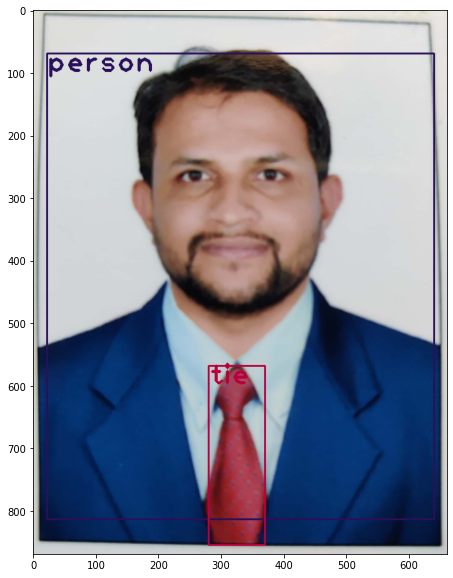

In [22]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img)